In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#extracting audio
import os
import subprocess

VIDEO_DIR = "/content/drive/MyDrive/DL_proj_test/videos"
AUDIO_DIR = "/content/drive/MyDrive/DL_proj_test/audio"
os.makedirs(AUDIO_DIR, exist_ok=True)
videos = [v for v in os.listdir(VIDEO_DIR) if v.endswith(".mp4")]
print("Found videos:", len(videos))

for v in videos:
    video_path = os.path.join(VIDEO_DIR, v)
    audio_path = os.path.join(AUDIO_DIR, v.replace(".mp4", ".wav"))

    cmd = [
        "ffmpeg",
        "-y",
        "-i", video_path,
        "-ac", "1",        # mono
        "-ar", "16000",    # 16khz
        audio_path
    ]

    subprocess.run(
        cmd,
        stdout=subprocess.DEVNULL,
        stderr=subprocess.DEVNULL
    )

print("Audio extraction complete.")

Found videos: 15
Audio extraction complete.


Found audio files: 14
Displaying spectrogram for --G-wKyj6JQ_000030.wav:


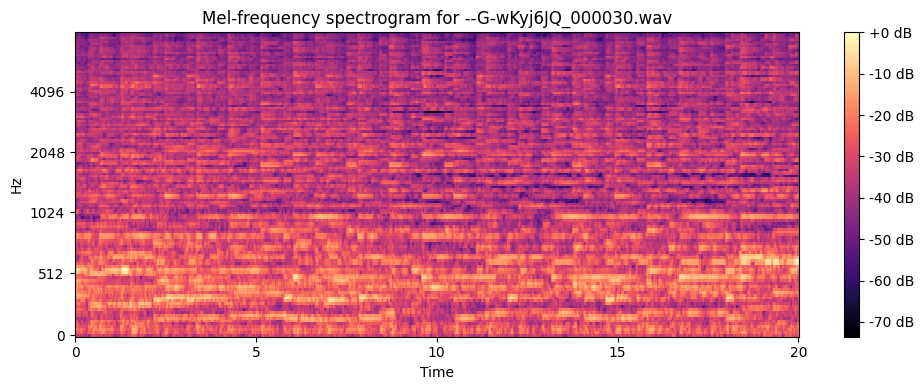

Displaying spectrogram for --HuBNHXu9I_000030.wav:


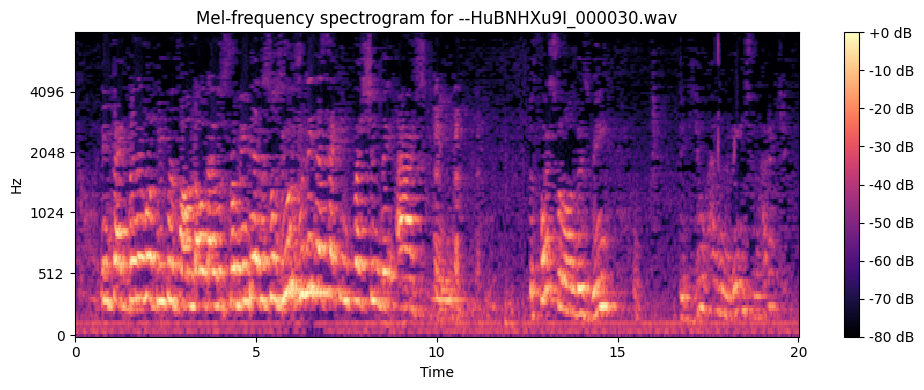

Displaying spectrogram for --CC5pH97q4_000004.wav:


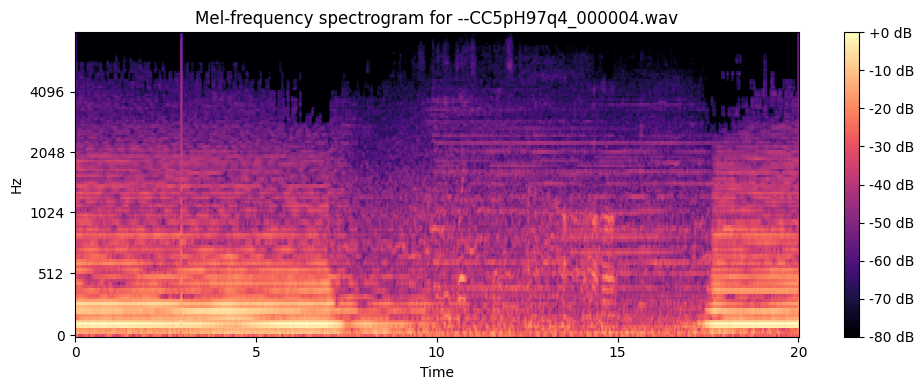

Displaying spectrogram for --Bu2xe4OSo_000430.wav:


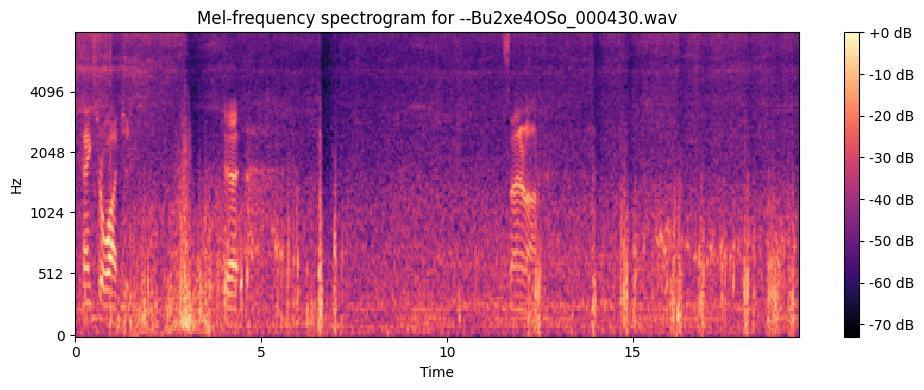

Displaying spectrogram for --FenyW2i_4_000000.wav:


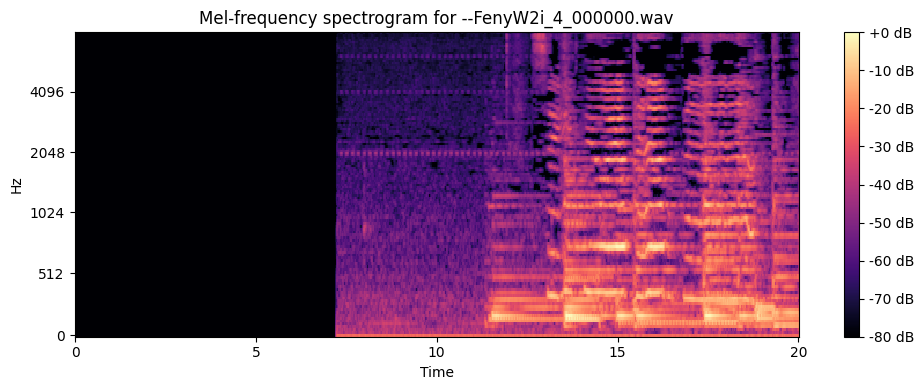

Mel spectrogram extraction complete.


In [10]:
#converting to spectrogram
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

AUDIO_DIR = "/content/drive/MyDrive/DL_proj_test/audio"
MEL_DIR = "/content/drive/MyDrive/DL_proj_test/mel"

os.makedirs(MEL_DIR, exist_ok=True)

audio_files = [f for f in os.listdir(AUDIO_DIR) if f.endswith(".wav")]

print("Found audio files:", len(audio_files))

printed_count = 0
for f in audio_files:
    audio_path = os.path.join(AUDIO_DIR, f)
    y, sr = librosa.load(audio_path, sr=16000)
    mel = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_mels=128,
        n_fft=1024,
        hop_length=256
    )
    mel_db = librosa.power_to_db(mel, ref=np.max)
    out_path = os.path.join(MEL_DIR, f.replace(".wav", ".npy"))
    np.save(out_path, mel_db)

    if printed_count < 5:
        print(f"Displaying spectrogram for {f}:")
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Mel-frequency spectrogram for {f}')
        plt.tight_layout()
        plt.show()
        printed_count += 1

print("Mel spectrogram extraction complete.")

Found videos: 15
Displaying frame 0 from video --CC5pH97q4_000033.mp4:


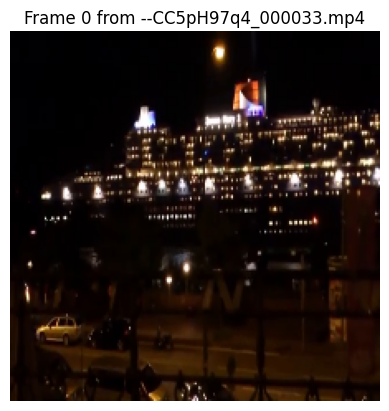

Displaying frame 1 from video --CC5pH97q4_000033.mp4:


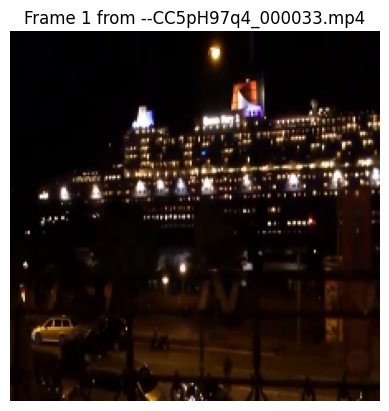

Displaying frame 2 from video --CC5pH97q4_000033.mp4:


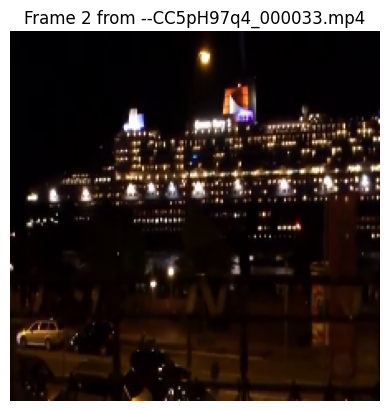

Displaying frame 3 from video --CC5pH97q4_000033.mp4:


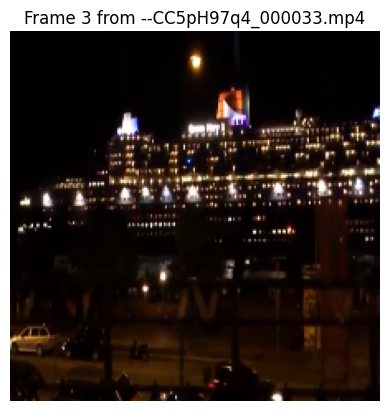

Displaying frame 4 from video --CC5pH97q4_000033.mp4:


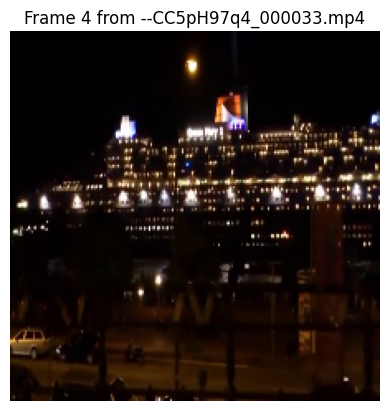

Frame extraction complete.


In [11]:
#video frames
import os
import cv2
import matplotlib.pyplot as plt

VIDEO_DIR = "/content/drive/MyDrive/DL_proj_test/videos"
FRAME_DIR = "/content/drive/MyDrive/DL_proj_test/frames"

NUM_FRAMES = 16
SIZE = 224

os.makedirs(FRAME_DIR, exist_ok=True)

videos = [v for v in os.listdir(VIDEO_DIR) if v.endswith(".mp4")]
print("Found videos:", len(videos))

printed_count = 0
for v in videos:
    video_path = os.path.join(VIDEO_DIR, v)
    video_name = v.replace(".mp4", "")
    out_dir = os.path.join(FRAME_DIR, video_name)
    os.makedirs(out_dir, exist_ok=True)

    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if total_frames <= 0:
        cap.release()
        continue

    step = max(total_frames // NUM_FRAMES, 1)

    saved = 0
    idx = 0

    while cap.isOpened() and saved < NUM_FRAMES:
        ret, frame = cap.read()
        if not ret:
            break

        if idx % step == 0:
            frame = cv2.resize(frame, (SIZE, SIZE))
            frame_path = os.path.join(out_dir, f"{saved:03d}.jpg")
            cv2.imwrite(frame_path, frame)

            if printed_count < 5:
                print(f"Displaying frame {saved} from video {v}:")
                plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
                plt.title(f"Frame {saved} from {v}")
                plt.axis('off')
                plt.show()
                printed_count += 1

            saved += 1

        idx += 1

    cap.release()

print("Frame extraction complete.")